In [1]:
# 可視化用のライブラリをインポート（numpy, pandasを含む）
import numpy as np
import pandas as pd
# import seaborn
import matplotlib.pyplot as plt 
%matplotlib inline

# keras用のパッケージをインポート
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [9]:
from keras import layers
from keras import models
model = models.Sequential()
# 入力（28, 28, 1）に対し、フィルタサイズ3x3, チャネル数32=>(26, 26, 32)の特徴マップが生成される
# Conv2D(output_depth, (window_height, window_width))の形式で指定
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# ストライド2x2なので、MaxPoolingの結果は、(26, 26)=>(13, 13)になる
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [13]:
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 84s - loss: 0.1675 - acc: 0.9473    
Epoch 2/5
60000/60000 [==============================] - 83s - loss: 0.0475 - acc: 0.9859    
Epoch 3/5
60000/60000 [==============================] - 83s - loss: 0.0339 - acc: 0.9897    
Epoch 4/5
60000/60000 [==============================] - 87s - loss: 0.0257 - acc: 0.9920    
Epoch 5/5
60000/60000 [==============================] - 86s - loss: 0.0202 - acc: 0.9939    


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

 9920/10000 [============================>.] - ETA: 0s

0.99160000000000004

In [2]:
import os, shutil

# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'Downloads/kaggle_original_data/train'
# The directory where we will
# store our smaller dataset
base_dir = 'Downloads/cats_and_dogs_small'
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

def makeSmallData():
    os.mkdir(base_dir)
    os.mkdir(train_dir)
    os.mkdir(validation_dir)
    os.mkdir(test_dir)
    os.mkdir(train_cats_dir)
    os.mkdir(train_dogs_dir)
    os.mkdir(validation_cats_dir)
    os.mkdir(validation_dogs_dir)
    os.mkdir(test_cats_dir)
    os.mkdir(test_dogs_dir)
    # Copy first 1000 cat images to train_cats_dir
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_cats_dir, fname)
        shutil.copyfile(src, dst)
    # Copy next 500 cat images to validation_cats_dir
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_cats_dir, fname)
        shutil.copyfile(src, dst)
    # Copy next 500 cat images to test_cats_dir
    fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_cats_dir, fname)
        shutil.copyfile(src, dst)
    # Copy first 1000 dog images to train_dogs_dir
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_dogs_dir, fname)
        shutil.copyfile(src, dst)
    # Copy next 500 dog images to validation_dogs_dir
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_dogs_dir, fname)
        shutil.copyfile(src, dst)
    # Copy next 500 dog images to test_dogs_dir
    fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_dogs_dir, fname)
        shutil.copyfile(src, dst)
# 一回のみ実行して、以降コメントアウト
# makeSmallData()

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)  # all images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=20,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch:', data_batch.shape)
    print('labels batch:', labels_batch.shape)
    # generatorが無限にバッチを繰り返すためbreakを入れる
    break

('data batch:', (20, 150, 150, 3))
('labels batch:', (20,))


## IOError: decoder jpeg not available
このエラーの対処方法

In [2]:
%%bash
sudo apt-get install -y libjpeg8-dev
sudo ln -s /usr/lib/x86_64-linux-gnu/libjpeg.so /usr/lib
sudo sage -sh <<EOF
pip install --no-cache-dir -I pillow
EOF

Reading package lists...
Building dependency tree...
Reading state information...
libjpeg8-dev is already the newest version.
libjpeg8-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
  Running setup.py install for olefile: started
    Running setup.py install for olefile: finished with status 'done'


sudo: no tty present and no askpass program specified

Starting subshell with Sage environment variables set.  Don't forget
to exit when you are done.  Beware:
 * Do not do anything with other copies of Sage on your system.
 * Do not use this for installing Sage packages using "sage -i" or for
   running "make" at Sage's root directory.  These should be done
   outside the Sage shell.

Note: SAGE_ROOT=/usr/lib/sagemath
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Exited Sage subshell.


In [8]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 202s - loss: 0.6912 - acc: 0.5340 - val_loss: 0.6742 - val_acc: 0.5770
Epoch 2/30
100/100 [==============================] - 202s - loss: 0.6542 - acc: 0.6230 - val_loss: 0.6655 - val_acc: 0.5570
Epoch 3/30
100/100 [==============================] - 226s - loss: 0.6104 - acc: 0.6705 - val_loss: 0.6155 - val_acc: 0.6650
Epoch 4/30
100/100 [==============================] - 204s - loss: 0.5626 - acc: 0.7100 - val_loss: 0.5852 - val_acc: 0.6820
Epoch 5/30
100/100 [==============================] - 201s - loss: 0.5253 - acc: 0.7435 - val_loss: 0.5798 - val_acc: 0.6980
Epoch 6/30
100/100 [==============================] - 201s - loss: 0.4929 - acc: 0.7615 - val_loss: 0.5990 - val_acc: 0.6850
Epoch 7/30
100/100 [==============================] - 202s - loss: 0.4591 - acc: 0.7840 - val_loss: 0.5733 - val_acc: 0.7130
Epoch 8/30
100/100 [==============================] - 201s - loss: 0.4337 - acc: 0.8030 - val_loss: 0.6149 - val_acc: 0.7040


In [10]:
model.save('data/cats_and_dogs_small_1.h5')

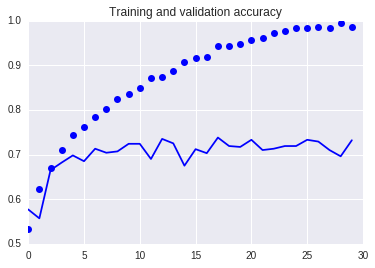

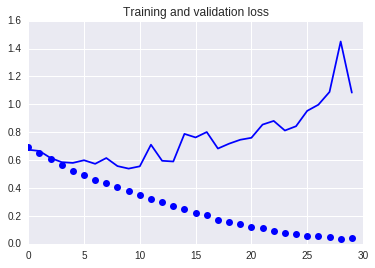

In [11]:
# 結果の可視化
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')

plt.show()

In [12]:
# データを増やす（回転、拡大、縮小、ねじれ）
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

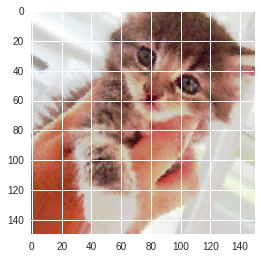

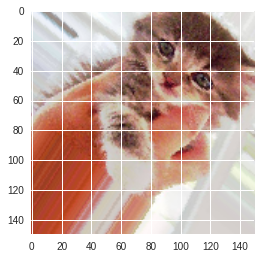

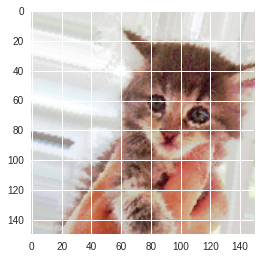

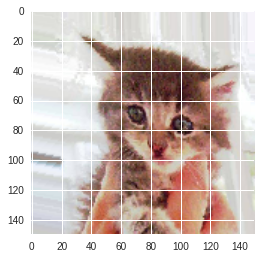

In [14]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]  # We pick one image to "augment"
img = image.load_img(img_path, target_size=(150, 150))  # Read the image and resize it
x = image.img_to_array(img)  # Convert it to a Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Reshape it to (1, 150, 150, 3)
# The .flow() command below generates batches of randomly transformed images. 
# It will loop indefinitely, so we need to `break` the loop at some point! 
i= 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# Dropoutを追加
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the target directory
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        class_mode='binary')  # Since we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      samples_per_epoch=2000,
      epochs=100,
      validation_data=validation_generator,
      nb_val_samples=1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/lib/sagemath/local/lib/python2.7/site-packages/ipykernel/__main__.py:29: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=62, epochs=100, validation_steps=1000)`


Epoch 1/100
62/62 [==============================] - 1125s - loss: 0.6926 - acc: 0.5181 - val_loss: 0.6813 - val_acc: 0.5431
Epoch 2/100
62/62 [==============================] - 1099s - loss: 0.6822 - acc: 0.5418 - val_loss: 0.6694 - val_acc: 0.5956
Epoch 3/100
62/62 [==============================] - 1114s - loss: 0.6780 - acc: 0.5540 - val_loss: 0.6676 - val_acc: 0.5514
Epoch 4/100
62/62 [==============================] - 1114s - loss: 0.6668 - acc: 0.5847 - val_loss: 0.6586 - val_acc: 0.6011
Epoch 5/100
62/62 [==============================] - 1103s - loss: 0.6558 - acc: 0.5897 - val_loss: 0.6397 - val_acc: 0.5899
Epoch 6/100
62/62 [==============================] - 1104s - loss: 0.6446 - acc: 0.6139 - val_loss: 0.6156 - val_acc: 0.6596
Epoch 7/100
62/62 [==============================] - 1101s - loss: 0.6342 - acc: 0.6346 - val_loss: 0.6134 - val_acc: 0.6490
Epoch 8/100
62/62 [==============================] - 1107s - loss: 0.6214 - acc: 0.6487 - val_loss: 0.5922 - val_acc: 0.6692


KeyboardInterrupt: 

In [18]:
# 途中で強制終了しました。
model.save('data/cats_and_dogs_small_2.h5')

In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [3]:
# 後ですぐに使える様に保存
conv_base.save('Downloads/conv_base.h5')

In [4]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [5]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'Downloads/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i= 0
    for inputs_batch, labels_batch in generator:
            features_batch = conv_base.predict(inputs_batch)
            features[i * batch_size : (i + 1) * batch_size] = features_batch
            labels[i * batch_size : (i + 1) * batch_size] = labels_batch
            i += 1
            if i * batch_size >= sample_count:
                # Note that since generators yield data indefinitely in a loop,
                # we must `break` onces every image has been seen once.
                break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))
# 生成に時間がかかる

In [14]:
# 生成に時間がかかったので、保存しておく
import gzip
import cPickle as pickle

obj = [train_features, validation_features, test_features]

with gzip.GzipFile('data/features.pickle.zip', 'w') as f:
     pickle.dump(obj, f)

In [8]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 6s - loss: 0.4542 - acc: 0.7870 - val_loss: 0.3044 - val_acc: 0.8840
Epoch 2/30
2000/2000 [==============================] - 5s - loss: 0.2944 - acc: 0.8725 - val_loss: 0.2843 - val_acc: 0.8820
Epoch 3/30
2000/2000 [==============================] - 6s - loss: 0.2386 - acc: 0.9035 - val_loss: 0.2504 - val_acc: 0.9010
Epoch 4/30
2000/2000 [==============================] - 6s - loss: 0.2054 - acc: 0.9200 - val_loss: 0.2896 - val_acc: 0.8720
Epoch 5/30
2000/2000 [==============================] - 6s - loss: 0.1761 - acc: 0.9275 - val_loss: 0.2749 - val_acc: 0.8920
Epoch 6/30
2000/2000 [==============================] - 6s - loss: 0.1598 - acc: 0.9410 - val_loss: 0.2397 - val_acc: 0.9010
Epoch 7/30
2000/2000 [==============================] - 6s - loss: 0.1377 - acc: 0.9505 - val_loss: 0.2464 - val_acc: 0.9050
Epoch 8/30
2000/2000 [==============================] - 5s - loss: 0.1249 - a

In [10]:
model.save('data/cats_and_dogs_small_3.h5')

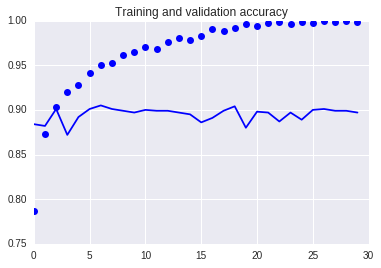

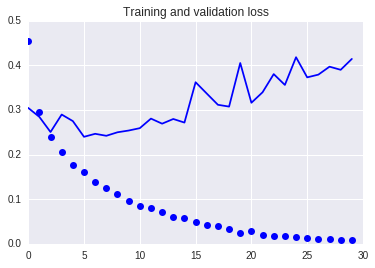

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()

In [16]:
# Visualizing intermediate activations
from keras.models import load_model

model = load_model('data/cats_and_dogs_small_2.h5')
model.summary()  # As a reminder.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [17]:
img_path = 'Downloads/cats_and_dogs_small/test/cats/cat.1700.jpg'
# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


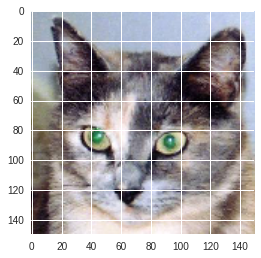

In [18]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])

In [20]:
from keras import models
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(input=model.input, output=layer_outputs)

/usr/lib/sagemath/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("co...)`


In [21]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

In [22]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


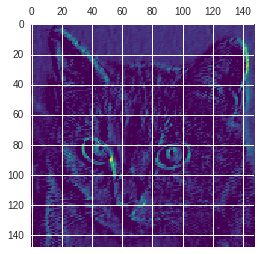

In [23]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

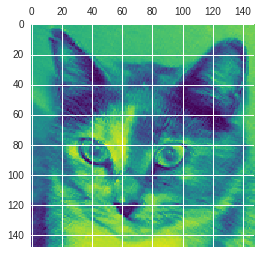

In [25]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

/usr/lib/sagemath/local/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in divide


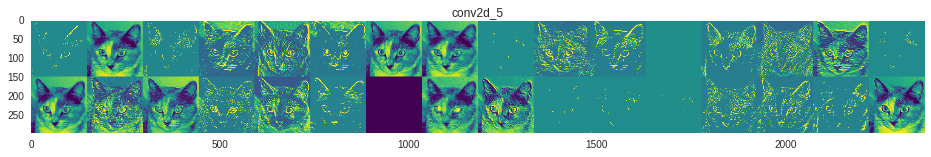

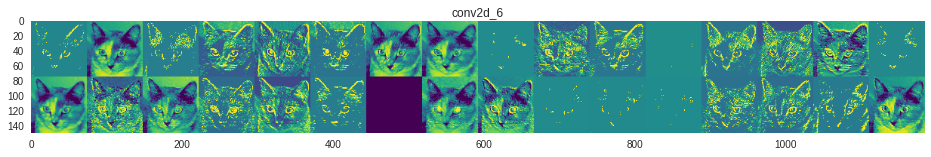

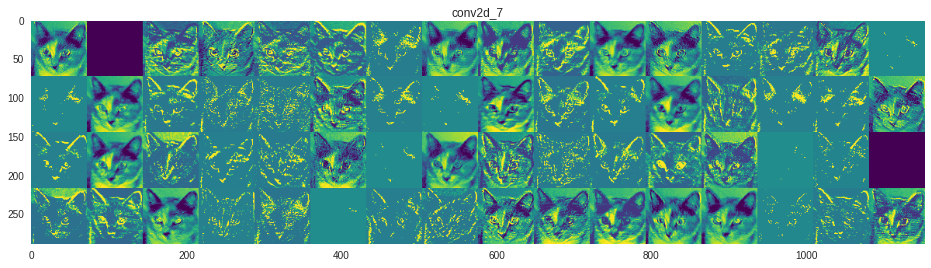

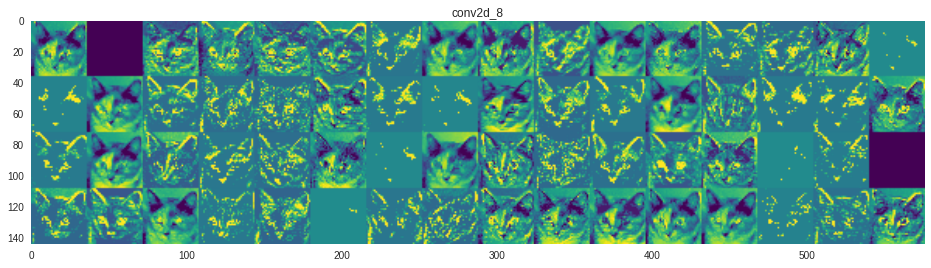

In [26]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    if isinstance(layer, layers.Conv2D):
        layer_names.append(layer.name)
images_per_row = 16
# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]
    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]
    # We will tile the activation channels in this matrix
    n_cols = n_features / images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1)
                * size] = channel_image
    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [28]:
model = load_model('Downloads/conv_base.h5')
model.summary()  # As a reminder.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

/usr/lib/sagemath/local/lib/python2.7/site-packages/keras/models.py:248: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [30]:
import keras.backend as K

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [31]:
# The call to `gradients` returns a list of tensors (of size 1 in this case)
# hence we only keep the first element -- which is a tensor.
grads = K.gradients(loss, model.input)[0]

In [32]:
#  We add 1e-5 before dividing so as to avoid accidentally dividing by 0.
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [34]:
iterate = K.function([model.input], [loss, grads])

# Let's test it:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [35]:
# we start from a gray image with some noise
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# run gradient ascent for 40 steps
step = 1.  # this is the magnitude of each gradient update
for i in range(40):
    # compute the loss value and gradient value
    loss_value, grads_value = iterate([input_img_data])
    # here we adjust the input image in the direction that maximizes the loss
    input_img_data += grads_value * step

In [36]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)
    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [39]:
def generate_pattern(layer_name, filter_index, size=150):
    # build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    # compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]
    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    # this function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    # we start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    # run gradient ascent for 40 steps
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    return deprocess_image(img)

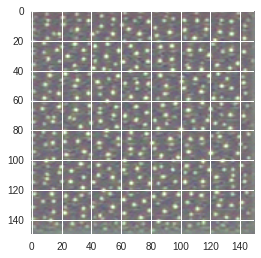

In [40]:
plt.imshow(generate_pattern('block3_conv1', 0))

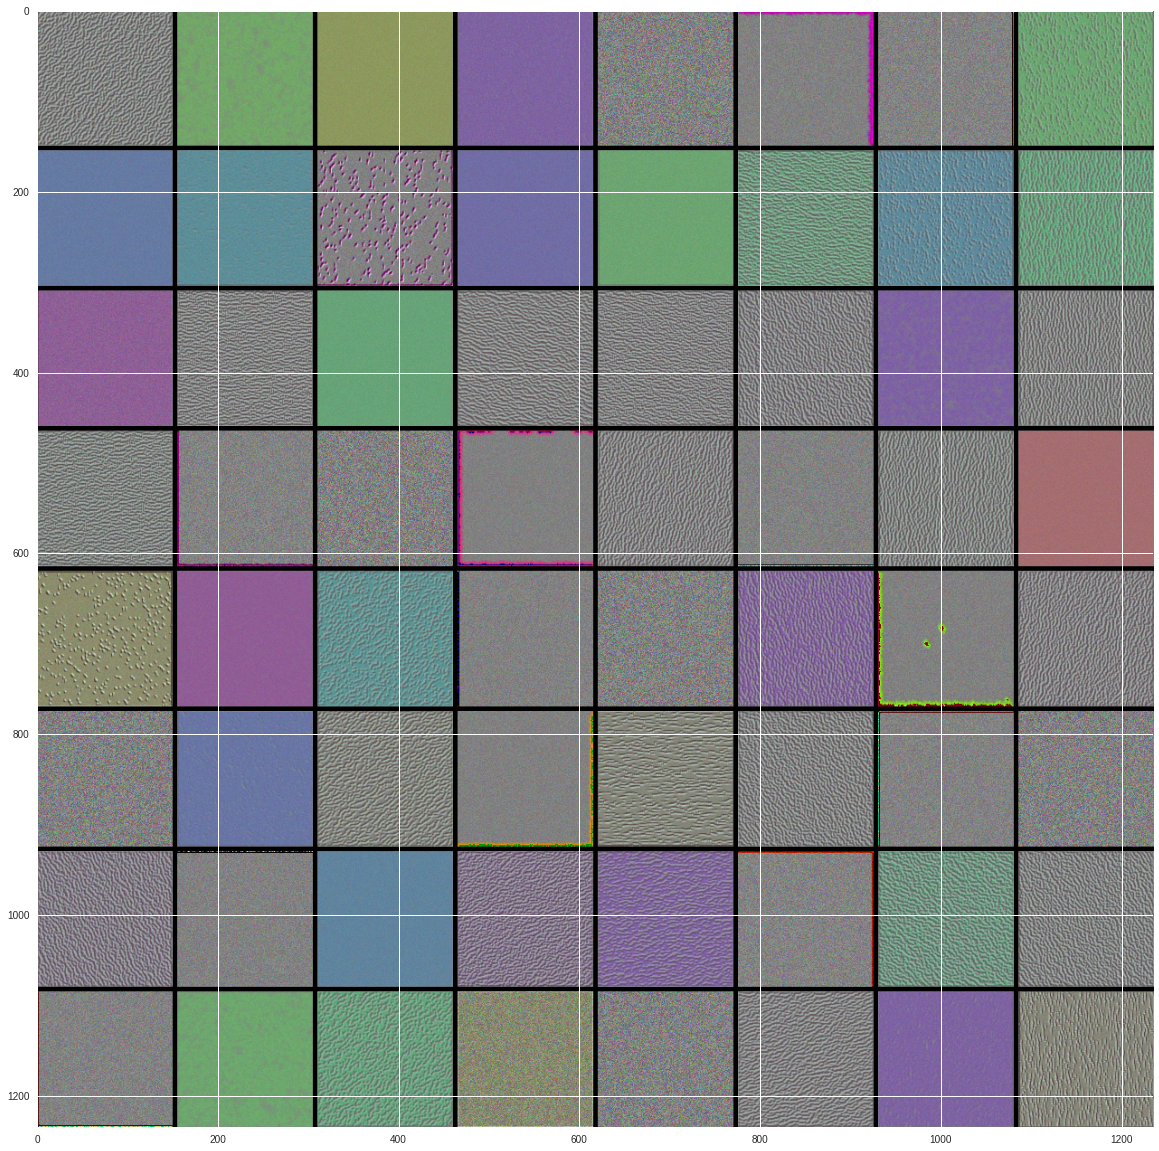

In [42]:
layer_name = 'block1_conv1'
size = 150
margin = 5
# this a empty (black) image where we will store our results.
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))
for i in range(8):  # iterate over the rows of our results grid
    for j in range(8):  # iterate over the columns of our results grid
        # generate the pattern for filter `i + (j * 8)` in `layer_name`
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        # put the result in the square `(i, j)` of the results grid
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
# display the results grid
plt.figure(figsize=(20, 20))
plt.imshow(results)

In [44]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet')

In [45]:
# ダウンロードに時間がかかるので保存しておく
model.save('Downloads/vgg16_weight.h5')

In [46]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# the local path to our target image
img_path = 'Downloads/creative_commons_elephant.jpg'

# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))
# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)
# we add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)
# finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprocess_input(x)

In [47]:
preds = model.predict(x)

In [48]:
print('Predicted:', decode_predictions(preds, top=3)[0])

('Predicted:', [(u'n02504458', u'African_elephant', 0.84587836), (u'n01871265', u'tusker', 0.14175005), (u'n02504013', u'Indian_elephant', 0.012191397)])


In [49]:
np.argmax(preds[0])

386

In [52]:
# this is the "african elephant" entry in the prediction vector
african_elephant_output = model.output[:, 386]

# the is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model.get_layer('block5_conv3')

# this is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# this is a vector of shape (512,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# this function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `block5_conv3`,
# given a sample image
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
# these are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([x])

# we multiply each channel in the feature map array
# by "how important this channel is" with regard to the elephant class
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# the channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

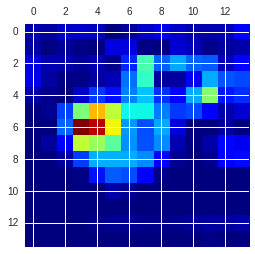

In [59]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap, cmap='jet')

In [65]:
%%bash
sudo dpkg-preconfigure -f noninteractive -p critical
sudo apt-get install -y python-opencv

sudo sage -sh <<EOF
pip install opencv-python
EOF

Reading package lists...
Building dependency tree...
Reading state information...
python-opencv is already the newest version.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


sudo: no tty present and no askpass program specified

Starting subshell with Sage environment variables set.  Don't forget
to exit when you are done.  Beware:
 * Do not do anything with other copies of Sage on your system.
 * Do not use this for installing Sage packages using "sage -i" or for
   running "make" at Sage's root directory.  These should be done
   outside the Sage shell.

Note: SAGE_ROOT=/usr/lib/sagemath
The directory '/home/sage/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/sage/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider

In [66]:
import cv2

# we use cv2 to load the original image
img = cv2.imread(img_path)
# we resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
# we convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
# we apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
# 0.4 here is a heatmap intensity factor
superimposed_img = heatmap * 0.4 + img
# save the image to disk
cv2.imwrite('Downloads/elephant_cam.jpg', superimposed_img)

True

<img src="Downloads/elephant_cam.jpg" width="480"/>